In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Read the dataset
df = pd.read_csv('supermarket_sales.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Create a new dataframe suitable for Prophet
df_prophet = df[['Date', 'Unit price', 'Product line']].rename(columns={'Date': 'ds', 'Unit price': 'y'})

# Step 4: Get unique product lines
product_lines = df['Product line'].unique()

# Step 5: Create a figure for plotting
plt.figure(figsize=(12, 8))

# Step 6: Loop through each product line, fit a Prophet model, and forecast
for product in product_lines:
    product_df = df_prophet[df_prophet['Product line'] == product]
    
    # Initialize the Prophet model
    model = Prophet()
    model.fit(product_df[['ds', 'y']])  # Pass only ds and y columns
    
    # Create a dataframe for future dates (predict for the next 2 years, i.e., 730 days)
    future = model.make_future_dataframe(product_df[['ds']], periods=730)  # Only pass 'ds' column
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot the forecast for the product line
    model.plot(forecast, ax=plt.gca(), xlabel='Date', ylabel='Unit Price')

# Step 7: Display the plot
plt.title('Unit Price Forecast by Product Line (Next 2 Years)', fontsize=16)
plt.legend(product_lines)
plt.show()


16:18:05 - cmdstanpy - INFO - Chain [1] start processing
16:18:05 - cmdstanpy - INFO - Chain [1] done processing


TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

<Figure size 1200x800 with 0 Axes>

In [17]:
pip install pandas matplotlib statsmodels


C:\Users\sbcvj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sbcvj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sbcvj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sbcvj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sbcvj\anaconda3\Lib\site-

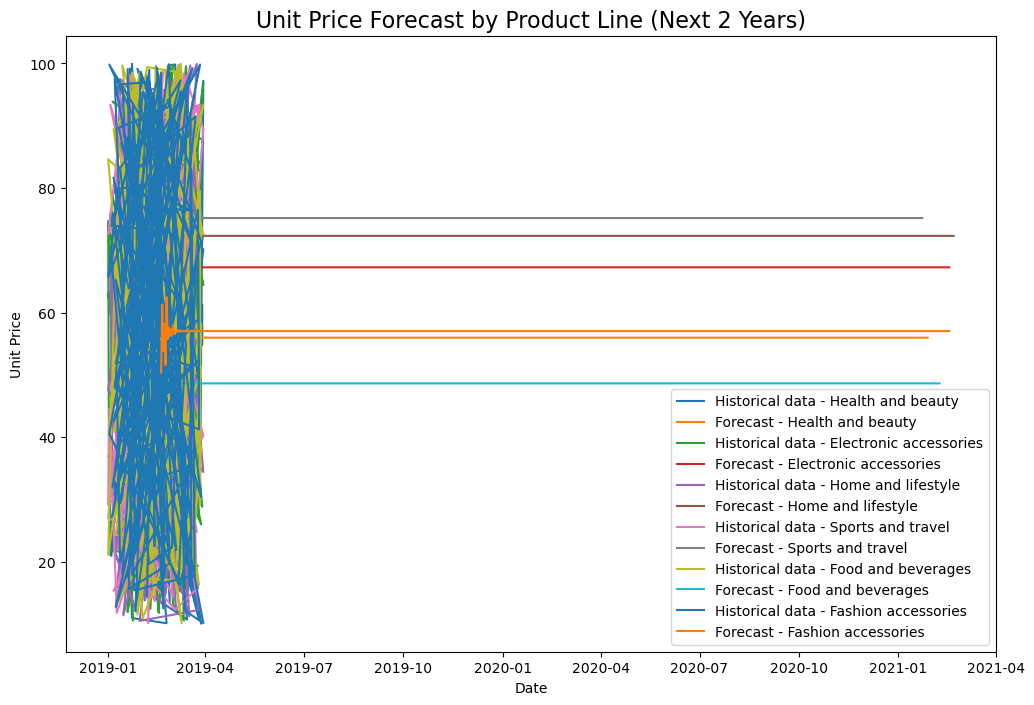

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Step 1: Read the dataset
df = pd.read_csv('supermarket_sales.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Create a new dataframe suitable for ARIMA
df_prophet = df[['Date', 'Unit price', 'Product line']].rename(columns={'Date': 'ds', 'Unit price': 'y'})

# Step 4: Get unique product lines
product_lines = df['Product line'].unique()

# Step 5: Create a figure for plotting
plt.figure(figsize=(12, 8))

# Step 6: Loop through each product line, fit an ARIMA model, and forecast
for product in product_lines:
    product_df = df_prophet[df_prophet['Product line'] == product]
    
    # Set the Date column as index for time series forecasting
    product_df.set_index('ds', inplace=True)
    
    # Step 7: Fit an ARIMA model
    model = ARIMA(product_df['y'], order=(5, 1, 0))  # (p,d,q) = (5, 1, 0) is a basic ARIMA model
    model_fit = model.fit()
    
    # Step 8: Make predictions (forecast for next 10 years)
    forecast_steps = 730
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Step 9: Create the forecasted date range for the plot
    future_dates = pd.date_range(start=product_df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
    
    # Step 10: Plot the forecast for the product line
    plt.plot(product_df.index, product_df['y'], label=f'Historical data - {product}')
    plt.plot(future_dates, forecast, label=f'Forecast - {product}')
    
# Step 11: Display the plot
plt.title('Unit Price Forecast by Product Line (Next 2 Years)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Read the dataset
df = pd.read_csv('supermarket_sales.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Extract relevant columns: Date and Unit Price
df = df[['Date', 'Unit price']]

# Step 4: Prepare the data for linear regression
# Convert dates to ordinal (numeric) values for regression
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Step 5: Fit a Linear Regression model to the data
X = df[['Date_ordinal']]  # Feature: Dates in ordinal format
y = df['Unit price']  # Target: Unit price

model = LinearRegression()
model.fit(X, y)

# Step 6: Forecast for the next 730 days (2 years)
future_dates_ordinal = pd.date_range(df['Date'].max(), periods=730, freq='D').map(pd.Timestamp.toordinal)
future_dates = pd.date_range(df['Date'].max(), periods=730, freq='D')  # Actual future dates for plotting

# Predict prices using the linear regression model
forecast_prices = model.predict(future_dates_ordinal.reshape(-1, 1))

# Step 7: Plot the historical data and the forecasted prices
plt.figure(figsize=(12, 6))

# Plot historical prices
plt.plot(df['Date'], df['Unit price'], label='Historical Data', color='blue')

# Plot forecasted prices
plt.plot(future_dates, forecast_prices, label='Forecasted Prices (Next 2 years)', color='orange', linestyle='--')

# Add labels and title
plt.title('Unit Price Forecast (Next 2 Years) with Linear Regression', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()

# Show the plot
plt.show()


AttributeError: 'Index' object has no attribute 'reshape'

C:\Users\sbcvj\AppData\Local\Temp\ipykernel_6072\1621603953.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Date_ordinal'] = product_df['Date'].map(pd.Timestamp.toordinal)
C:\Users\sbcvj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sbcvj\AppData\Local\Temp\ipykernel_6072\1621603953.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Date_ordinal'] =

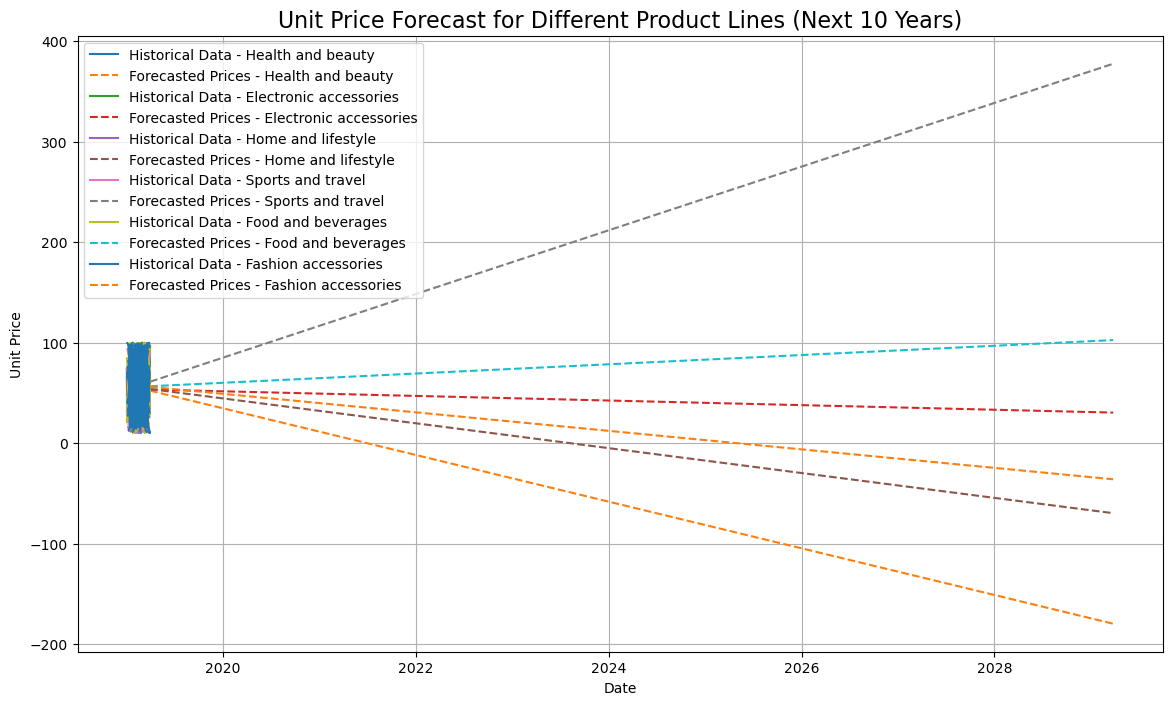

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Read the dataset
df = pd.read_csv('supermarket_sales.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Extract relevant columns: Date, Unit Price, and Product Line
df = df[['Date', 'Unit price', 'Product line']]

# Step 4: Prepare the figure for plotting
plt.figure(figsize=(14, 8))

# Step 5: Loop through each product line to fit a Linear Regression model
product_lines = df['Product line'].unique()

for product in product_lines:
    # Filter data for the current product line
    product_df = df[df['Product line'] == product]
    
    # Convert 'Date' to ordinal values (numeric) for regression
    product_df['Date_ordinal'] = product_df['Date'].map(pd.Timestamp.toordinal)
    
    # Prepare the data for regression
    X = product_df[['Date_ordinal']]  # Features: Dates in ordinal format
    y = product_df['Unit price']  # Target: Unit price
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Step 6: Forecast the next 730 days (2 years)
    future_dates = pd.date_range(product_df['Date'].max(), periods=3650, freq='D')  # Future dates for 2 years
    future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal)  # Convert future dates to ordinal format
    
    # Convert future_dates_ordinal to a numpy array and reshape it for the model
    future_dates_ordinal = np.array(future_dates_ordinal).reshape(-1, 1)
    
    # Predict the future prices using the linear regression model
    forecast_prices = model.predict(future_dates_ordinal)
    
    # Step 7: Plot the historical data and the forecasted prices
    plt.plot(product_df['Date'], product_df['Unit price'], label=f'Historical Data - {product}')
    plt.plot(future_dates, forecast_prices, label=f'Forecasted Prices - {product}', linestyle='--')

# Step 8: Customize the plot
plt.title('Unit Price Forecast for Different Product Lines (Next 10 Years)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.grid(True)

# Step 9: Show the plot
plt.show()


C:\Users\sbcvj\AppData\Local\Temp\ipykernel_6072\4188277180.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Date_ordinal'] = product_df['Date'].map(pd.Timestamp.toordinal)
C:\Users\sbcvj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sbcvj\AppData\Local\Temp\ipykernel_6072\4188277180.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Date_ordinal'] =

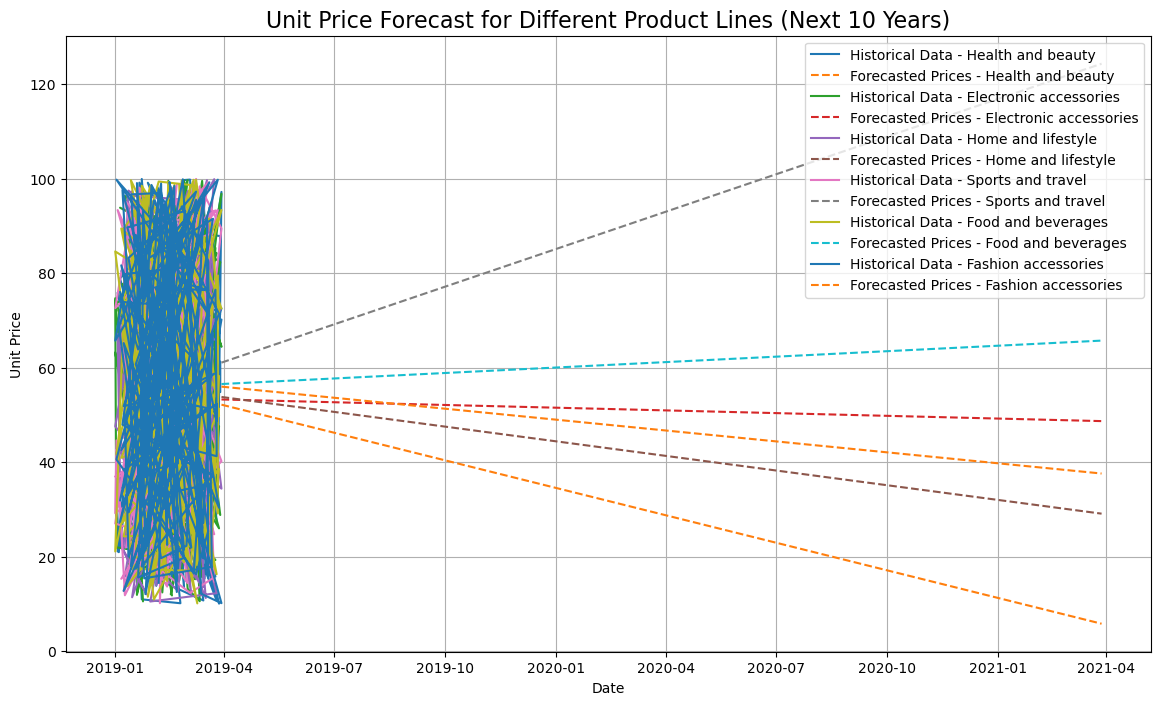

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Read the dataset
df = pd.read_csv('supermarket_sales.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Extract relevant columns: Date, Unit Price, and Product Line
df = df[['Date', 'Unit price', 'Product line']]

# Step 4: Prepare the figure for plotting
plt.figure(figsize=(14, 8))

# Step 5: Loop through each product line to fit a Linear Regression model
product_lines = df['Product line'].unique()

for product in product_lines:
    # Filter data for the current product line
    product_df = df[df['Product line'] == product]
    
    # Convert 'Date' to ordinal values (numeric) for regression
    product_df['Date_ordinal'] = product_df['Date'].map(pd.Timestamp.toordinal)
    
    # Prepare the data for regression
    X = product_df[['Date_ordinal']]  # Features: Dates in ordinal format
    y = product_df['Unit price']  # Target: Unit price
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Step 6: Forecast the next 730 days (2 years)
    future_dates = pd.date_range(product_df['Date'].max(), periods=730, freq='D')  # Future dates for 2 years
    future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal)  # Convert future dates to ordinal format
    
    # Convert future_dates_ordinal to a numpy array and reshape it for the model
    future_dates_ordinal = np.array(future_dates_ordinal).reshape(-1, 1)
    
    # Predict the future prices using the linear regression model
    forecast_prices = model.predict(future_dates_ordinal)
    
    # Step 7: Plot the historical data and the forecasted prices
    plt.plot(product_df['Date'], product_df['Unit price'], label=f'Historical Data - {product}')
    plt.plot(future_dates, forecast_prices, label=f'Forecasted Prices - {product}', linestyle='--')

# Step 8: Customize the plot
plt.title('Unit Price Forecast for Different Product Lines (Next 10 Years)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.grid(True)

# Step 9: Show the plot
plt.show()